In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [29]:
feature_names = iris.feature_names
target_names = iris.target_names
print(f"feature names: {feature_names}")
print(f"target names: {target_names}")
print("First 10 rows are: ")
print(x[:10])
print(y[:10])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
First 10 rows are: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


Splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
iris = load_iris()
x = iris.data
y = iris.target


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [16]:
print(f"Original shape of X {x.shape}")
print(f"Original shape of Y {y.shape}")
print(f"shape of X train {x_train.shape}")
print(f"shape of X test {x_test.shape}")
print(f"shape of y train {y_train.shape}")
print(f"shape of y test {y_test.shape}")


Original shape of X (150, 4)
Original shape of Y (150,)
shape of X train (105, 4)
shape of X test (45, 4)
shape of y train (105,)
shape of y test (45,)


Train the Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(x_train, y_train)
y_pred = classifier_knn.predict(x_test)
#finding the accuracy of the model
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is: {round(acc,2)*100}%")

Accuracy of the model is: 98.0%


In [27]:
#Providing sample data and the model will make the predictions out of that data
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
print(f"The target names present are: {target_names}")
print(f"Preds hold: {preds}")
pred_species = [iris.target_names[p] for p in preds] 
print(f"Predictions: {pred_species}")

The target names present are: ['setosa' 'versicolor' 'virginica']
Preds hold: [1 2]
Predictions: ['versicolor', 'virginica']


Model Persistence

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(classifier_knn, 'iris_classifier_knn.joblib') #will store the file with the file name specified
#to load back the model
joblib.load('iris_classifier_knn.joblib')

Preprocessing of the Data

In [34]:
import numpy as np
from sklearn import preprocessing

In [36]:
Input_data = np.array( [[2.1, -1.9, 5.5], 
	[-1.5, 2.4, 3.5], 
	[0.5, -7.9, 5.6], 
	[5.9, 2.3, -5.8]] )

data_binarized = preprocessing.Binarizer(threshold = 0.5).transform(Input_data)
print(data_binarized)


[[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


Mean Removal


In [37]:
print("Mean = ", Input_data.mean(axis = 0) )
print("Standard Deviation = ", Input_data.std(axis = 0) )
#Removing the mean and the standard deviation
data_scaled = preprocessing.scale(Input_data)
print("Mean Removed: ", data_scaled.mean(axis = 0))
print("Std Dev Removed: ", data_scaled.std(axis = 0))

Mean =  [ 1.75  -1.275  2.2  ]
Standard Deviation =  [2.71431391 4.20022321 4.69414529]
Mean Removed:  [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Std Dev Removed:  [1. 1. 1.]


Scaling


In [40]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(Input_data)

print("Min max scaled data", data_scaled_minmax)

[[ 2.1 -1.9  5.5]
 [-1.5  2.4  3.5]
 [ 0.5 -7.9  5.6]
 [ 5.9  2.3 -5.8]]
Min max scaled data [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]


Normalization

In [41]:
#L1 Normalization
data_normalized_l1 = preprocessing.normalize(Input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1) 


L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]


In [43]:
#L2 Normalization
data_normalized_l2 = preprocessing.normalize(Input_data, norm='l2')
print("\nL2 normalized data:\n", data_normalized_l2) 



L2 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


Data Representation

In [44]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head() 


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


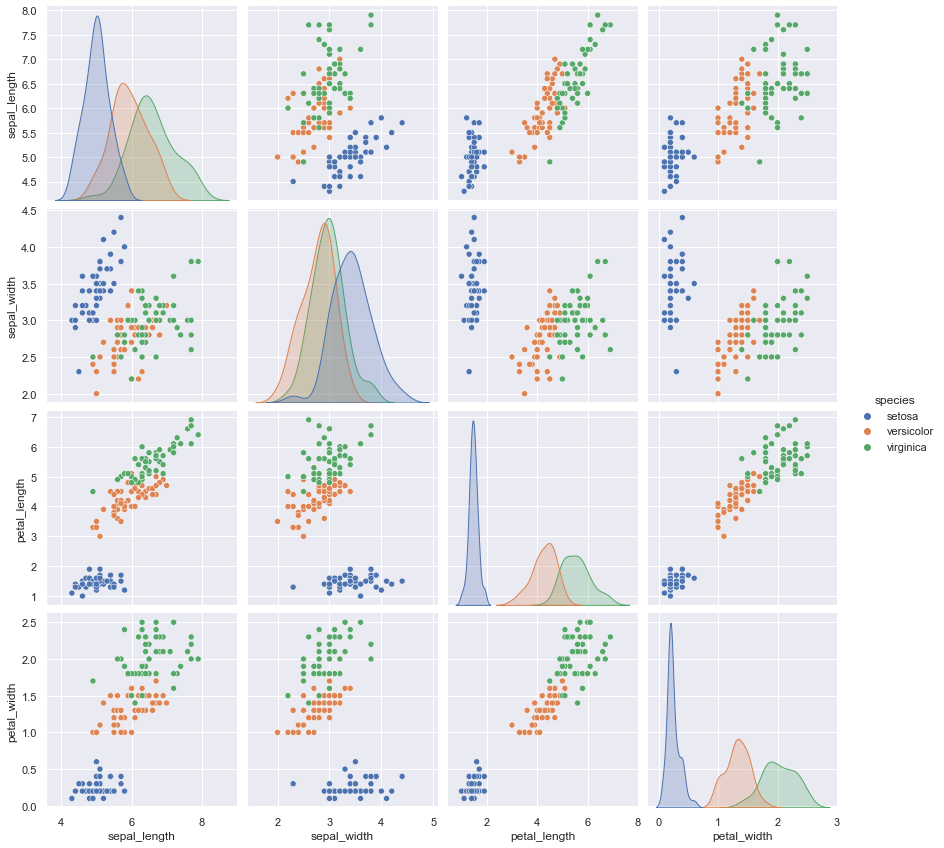

In [45]:
import seaborn as sns 
iris = sns.load_dataset('iris') 
%matplotlib inline 
import seaborn as sns; 
sns.set() 
sns.pairplot(iris, hue='species', height=3); 


In [47]:
X_iris = iris.drop('species', axis=1) 
print(X_iris.shape) 
y_iris = iris['species']
print(y_iris.shape) 


(150, 4)
(150,)
